In [141]:
##pip install python-docx wordcloud matplotlib


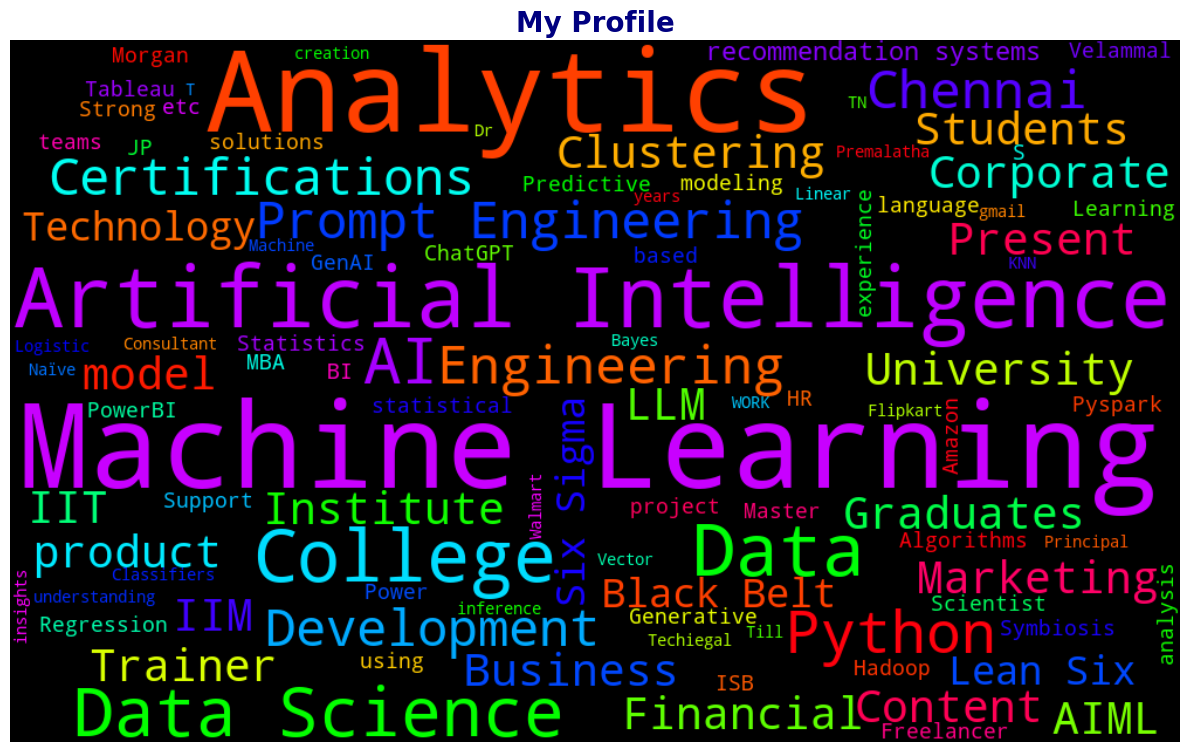

In [165]:
# Install required libraries (if not already installed)
# pip install python-docx wordcloud matplotlib

from docx import Document
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import random

# Function to extract text from a .docx file
def extract_text_from_docx(file_path):
    """
    Extracts all text from a .docx file.
    """
    try:
        doc = Document(file_path)
        text = " ".join([paragraph.text for paragraph in doc.paragraphs])
        return text
    except Exception as e:
        print(f"Error reading file: {e}")
        return ""

# Function to generate random colors for word cloud
def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    """
    Generate random colors for word cloud.
    """
    return f"hsl({random.randint(0, 360)}, 100%, 50%)"

# Function to generate and display a beautiful Word Cloud
def generate_word_cloud(text, title="Word Cloud"):
    """
    Generates and displays a word cloud with customized styling.
    """
    try:
        # Define stopwords to exclude common words
        stopwords = set(STOPWORDS)

        # Generate the Word Cloud
        wordcloud = WordCloud(
            width=1000,
            height=600,
            background_color="black",
            stopwords=stopwords,
            color_func=random_color_func,
            max_words=100,
            contour_width=2,
            contour_color="blue",
            font_path=None,  # Optional: Add a path to a TTF font for unique styling
        ).generate(text)

        # Display the Word Cloud
        plt.figure(figsize=(12, 8))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")  # Hide axes
        plt.title(title, fontsize=20, color="navy", weight="bold")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error generating Word Cloud: {e}")

# Main Script
if __name__ == "__main__":
    # Path to your .docx file
    file_path = "Mentor_16 years_AI.docx"

    # Extract text and generate Word Cloud
    text = extract_text_from_docx(file_path)

    if text.strip():  # Check if text is not empty
        generate_word_cloud(text, title="My Profile")
    else:
        print("No text found in the document. Please check the file.")
